<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/Assignment/Dataset1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

In [2]:
# Import library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.  Load Dataset

In [3]:
# Load data
# Colab library to upload files to notebook, Ref:https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Load data from Kaggle to Google Colab virtual machine
os.environ['KAGGLE_USERNAME'] = "emilyhsucr" # username from the json file
os.environ['KAGGLE_KEY'] = "3b6aa5aa02b468c89e4cfac52a5d992e" # key from the json file
!kaggle competitions download -c porto-seguro-safe-driver-prediction # api copied from kaggle

  0% 0.00/2.12M [00:00<?, ?B/s]
100% 2.12M/2.12M [00:00<00:00, 70.9MB/s]
 60% 18.0M/30.0M [00:00<00:00, 44.4MB/s]
100% 30.0M/30.0M [00:00<00:00, 100MB/s] 
 68% 30.0M/44.4M [00:00<00:00, 50.1MB/s]
100% 44.4M/44.4M [00:00<00:00, 100MB/s] 


In [0]:
# Titanic
Titanic = pd.read_csv("https://raw.githubusercontent.com/hsuemily/CE888_Hsu-Chi-Rou_1900759/master/Assignment/titanic_train.csv", delimiter = ",")


In [30]:
Titanic.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Data Visualization

Not Survival: 549
Survival: 342
Imbalance rate: 61.62 %


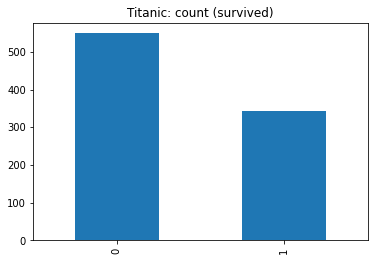

In [24]:
# Plot histogram of the label Survived in Titanic dataset
# Ref: https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python
# Ref: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
pd.Series(Titanic['Survived']).value_counts().plot(kind='bar',title='Titanic: count (survived)')
target_count = Titanic.Survived.value_counts()
print('Not Survival:', target_count[0])
print('Survival:', target_count[1])
print('Imbalance rate:', round((target_count[0] / (target_count[0]+target_count[1]))*100, 2), '%')

## 4. Data Preprocessing
 - 4.1 Missing Value
 - 4.2 Normalization
 - 4.3 Lable encoding or one hot encoding

### 4.1 Missing Value

In [56]:
# dealing with missing value

#*****Titanic
total = Titanic.isnull().sum().sort_values(ascending=False)
# summarize the amount of missing value in each attributes, and then sort it by descending order
# percent = the counts of missing value /the counts of item (in each attribute)
percent = (Titanic.isnull().sum()/Titanic.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

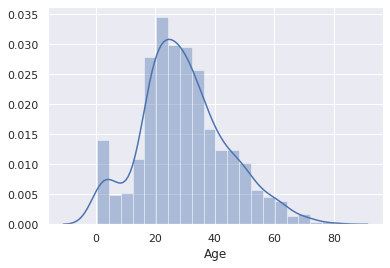

In [57]:
sns.distplot(Titanic['Age'])
Titanic['Age'].describe()

In [0]:
# median
Titanic_copy = Titanic.copy() # copy: copy the original data in order to keep the original data 
Titanic_copy.loc[Titanic_copy['Age'].isnull(),'Age']=Titanic_copy['Age'].mean(skipna=True)

In [59]:
# fill the most common value in the missing value in "Embarked" column
Titanic_copy['Embarked'] = Titanic_copy['Embarked'].fillna("S")
Titanic_copy['Embarked'].value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
Titanic_copy['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [61]:
Titanic_copy['Cabin'].value_counts()
a

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
E101           3
              ..
C110           1
C86            1
F E69          1
B78            1
B80            1
Name: Cabin, Length: 147, dtype: int64

In [0]:
#dealing with missing data
# fill them into none
cols1 = ["Cabin"]
for col in cols1:
    Titanic_copy[col].fillna("None", inplace=True)

In [63]:
#*****Titanic- check for the missing dataset again
total = Titanic_copy.isnull().sum().sort_values(ascending=False)
percent = (Titanic_copy.isnull().sum()/Titanic_copy.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Embarked,0,0.0
Cabin,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


### 4.3 Normalization

In [64]:
# Normalize dataset - Titanic
for col in Titanic_copy.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    Titanic_copy[col] = mms.fit_transform(Titanic_copy[[col]])
Titanic_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.289162,0.486592,0.418036,0.163383,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.271174,0.000000,0.000000,0.015440
50%,0.500000,0.000000,1.000000,0.367921,0.000000,0.000000,0.028213
75%,0.750000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.2 Lable encoding or one hot encoding

In [67]:
Titanic_X = Titanic_copy.drop(['Survived'], axis = 1)
## drop the pesnger ID, because it is not the valuable attribute.
Titanic_Y = np.array(Titanic_copy['Survived'])
# Using one hot encoding in Titanic and Adult dataset
# Ref: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
# creating one hot encoder object by default 
# entire data passed is one hot encoded 

# # Onehot Encoder
# # use onehot encoder, the silhouette_score are lower than 0.08
# Encoder = OneHotEncoder()
# Titanic_X = Encoder.fit_transform(Titanic_X).toarray()

# Label Encoder
from sklearn.preprocessing import LabelEncoder
for col in Titanic_X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    Titanic_X[col] = le.fit_transform(Titanic_X[col].astype('str'))
Titanic_X=Titanic_X.values

print("Titanic:",Titanic_X)
print(Titanic_X.shape)
print(Titanic_Y.shape)

Titanic: [[0.00000000e+00 1.00000000e+00 1.08000000e+02 ... 1.41510576e-02
  1.46000000e+02 2.00000000e+00]
 [1.12359551e-03 0.00000000e+00 1.90000000e+02 ... 1.39135735e-01
  8.10000000e+01 0.00000000e+00]
 [2.24719101e-03 1.00000000e+00 3.53000000e+02 ... 1.54685698e-02
  1.46000000e+02 2.00000000e+00]
 ...
 [9.97752809e-01 1.00000000e+00 4.13000000e+02 ... 4.57713517e-02
  1.46000000e+02 2.00000000e+00]
 [9.98876404e-01 0.00000000e+00 8.10000000e+01 ... 5.85561003e-02
  6.00000000e+01 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 2.20000000e+02 ... 1.51269926e-02
  1.46000000e+02 1.00000000e+00]]
(891, 11)
(891,)


In [0]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
for col in Titanic_copy.select_dtypes(include='object').columns:
    le = LabelEncoder()
    Titanic_copy[col] = le.fit_transform(Titanic_copy[col].astype('str'))
# Titanic_X=Titanic_X.values
Titanic_copy.head()

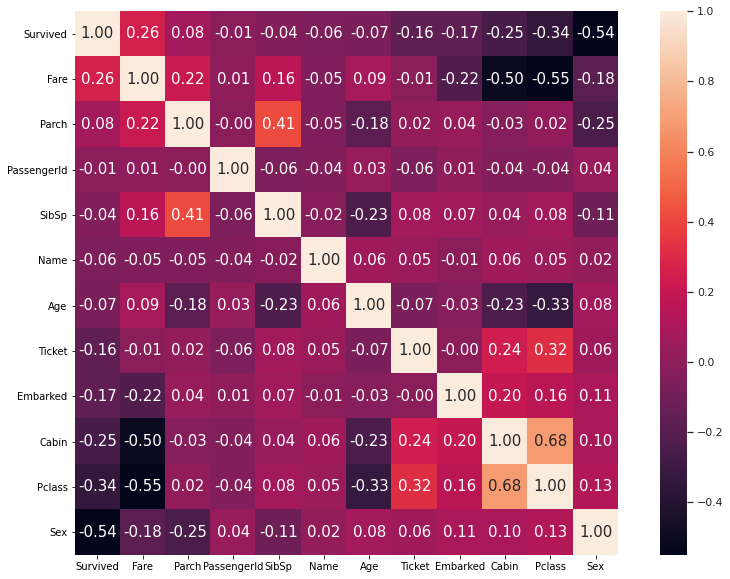

In [34]:
corrmat = Titanic_copy.corr()
k  = 12 # show ten attributes in heatmap (matrix of a relation)
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(Titanic_copy[cols].values.T)
plt.subplots(figsize=(15,10)) # Ref: https://datascience.stackexchange.com/questions/17540/make-seaborn-heatmap-bigger
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#---Saving plot from seaborn-----------------------------------------------------
# Ref: https://stackoverflow.com/questions/45569592/saving-plot-from-seaborn?rq=1
figure = hm.get_figure()    
figure.savefig('heatmap_class and features.png', dpi=400)

In [36]:
Titanic_X = Titanic_copy.drop(['Survived'], axis = 1)
Titanic_Y = np.array(Titanic_copy['Survived'])
Titanic_X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,1.0,0.121348,1.0,0.271174,0.125,0.000000,0.769118,0.014151,0.993197,1.0
1,0.001124,0.0,0.213483,0.0,0.472229,0.125,0.000000,0.876471,0.139136,0.551020,0.0
2,0.002247,1.0,0.396629,0.0,0.321438,0.000,0.000000,0.983824,0.015469,0.993197,1.0
3,0.003371,0.0,0.305618,0.0,0.434531,0.125,0.000000,0.072059,0.103644,0.374150,1.0
4,0.004494,1.0,0.016854,1.0,0.434531,0.000,0.000000,0.694118,0.015713,0.993197,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.995506,0.5,0.615730,1.0,0.334004,0.000,0.000000,0.148529,0.025374,0.993197,1.0
887,0.996629,0.0,0.340449,0.0,0.233476,0.000,0.000000,0.020588,0.058556,0.204082,1.0
888,0.997753,1.0,0.464045,0.0,0.367921,0.125,0.333333,0.992647,0.045771,0.993197,1.0
889,0.998876,0.0,0.091011,1.0,0.321438,0.000,0.000000,0.011765,0.058556,0.408163,0.0


In [0]:
Titanic_X=Titanic_X.values

## 5. Supervised Learning
### 5.1 Decision tree (cross-validation)
### 5.2 Random forest (cross-validation)

In [68]:
## Decision tree 

### Ref_1: https://www.kaggle.com/sudhirnl7/logistic-regression-with-stratifiedkfold
### Ref_2: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#
#Import library
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
cv_percisionDT =[]
cv_recallDT =[]
cv_F1scoreDT =[]
cv_scoreDTRoc = []
i=1
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]
    
    #model
    modelDT = tree.DecisionTreeClassifier(criterion = "entropy",random_state=1)
    # model = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=15, max_features=14, criterion = "entropy",random_state=1)
    modelDT.fit(x_tr,y_tr)
    percisionDT=precision_score(y_v,modelDT.predict(x_v))
    recallDT=recall_score(y_v,modelDT.predict(x_v))
    F1scoreDT=f1_score(y_v,modelDT.predict(x_v))
    scoreDTRoc = roc_auc_score(y_v,modelDT.predict(x_v))

    cv_percisionDT.append(percisionDT)
    cv_recallDT.append(recallDT)
    cv_F1scoreDT.append(F1scoreDT)
    cv_scoreDTRoc.append(scoreDTRoc)

    print('Confusion matrix\n',confusion_matrix(y_v,modelDT.predict(x_v)))
    print('Precision:', precision_score(y_v,modelDT.predict(x_v)))
    print('Recall:',recall_score(y_v,modelDT.predict(x_v)))
    print('F1 score:', f1_score(y_v,modelDT.predict(x_v)))
    print('ROC AUC score:',scoreDTRoc)

    i+=1 

1 of KFold 10
Confusion matrix
 [[45 10]
 [13 22]]
Precision: 0.6875
Recall: 0.6285714285714286
F1 score: 0.6567164179104478
ROC AUC score: 0.7233766233766233
2 of KFold 10
Confusion matrix
 [[48  7]
 [10 24]]
Precision: 0.7741935483870968
Recall: 0.7058823529411765
F1 score: 0.7384615384615385
ROC AUC score: 0.7893048128342247
3 of KFold 10
Confusion matrix
 [[47  8]
 [12 22]]
Precision: 0.7333333333333333
Recall: 0.6470588235294118
F1 score: 0.6875
ROC AUC score: 0.7508021390374331
4 of KFold 10
Confusion matrix
 [[46  9]
 [ 7 27]]
Precision: 0.75
Recall: 0.7941176470588235
F1 score: 0.7714285714285715
ROC AUC score: 0.8152406417112299
5 of KFold 10
Confusion matrix
 [[43 12]
 [ 9 25]]
Precision: 0.6756756756756757
Recall: 0.7352941176470589
F1 score: 0.7042253521126761
ROC AUC score: 0.7585561497326203
6 of KFold 10
Confusion matrix
 [[42 13]
 [ 8 26]]
Precision: 0.6666666666666666
Recall: 0.7647058823529411
F1 score: 0.7123287671232877
ROC AUC score: 0.7641711229946524
7 of KFold 1

In [69]:
from statistics import mean, stdev
print("Mean of percision:", round(mean(cv_percisionDT),3), '\nStandard Deviation of percision:', round(stdev(cv_percisionDT),3))
print("Mean of recall:", round(mean(cv_recallDT),3), '\nStandard Deviation of recall:', round(stdev(cv_recallDT),3))
print("Mean of F1score:", round(mean(cv_F1scoreDT),3), '\nStandard Deviation of F1score:', round(stdev(cv_F1scoreDT),3))
print("Mean of Roc score:", round(mean(cv_scoreDTRoc),3), '\nStandard Deviation of Roc score:', round(stdev(cv_scoreDTRoc),3))


Mean of percision: 0.683 
Standard Deviation of percision: 0.055
Mean of recall: 0.699 
Standard Deviation of recall: 0.08
Mean of F1score: 0.689 
Standard Deviation of F1score: 0.055
Mean of Roc score: 0.747 
Standard Deviation of Roc score: 0.042


In [70]:
## Random forest
from sklearn.ensemble import RandomForestClassifier
cv_percisionRF =[]
cv_recallRF =[]
cv_F1scoreRF =[]
cv_scoreRFRoc = []
i=1
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]
    
    #model
    modelRF = RandomForestClassifier(random_state=1)
    modelRF.fit(x_tr,y_tr)

    percisionRF=precision_score(y_v,modelRF.predict(x_v))
    recallRF=recall_score(y_v,modelRF.predict(x_v))
    F1scoreRF=f1_score(y_v,modelRF.predict(x_v))
    scoreRFRoc = roc_auc_score(y_v,modelRF.predict(x_v))

    cv_percisionRF.append(percisionRF)
    cv_recallRF.append(recallRF)
    cv_F1scoreRF.append(F1scoreRF)
    cv_scoreRFRoc.append(scoreRFRoc)

    print('Confusion matrix\n',confusion_matrix(y_v,modelRF.predict(x_v)))
    print('Precision:', precision_score(y_v,modelRF.predict(x_v)))
    print('Recall:',recall_score(y_v,modelRF.predict(x_v)))
    print('F1 score:', f1_score(y_v,modelRF.predict(x_v)))
    print('ROC AUC score:',scoreRFRoc)

    i+=1

1 of KFold 10
Confusion matrix
 [[50  5]
 [13 22]]
Precision: 0.8148148148148148
Recall: 0.6285714285714286
F1 score: 0.7096774193548386
ROC AUC score: 0.7688311688311689
2 of KFold 10
Confusion matrix
 [[52  3]
 [ 5 29]]
Precision: 0.90625
Recall: 0.8529411764705882
F1 score: 0.8787878787878787
ROC AUC score: 0.8991978609625669
3 of KFold 10
Confusion matrix
 [[53  2]
 [ 8 26]]
Precision: 0.9285714285714286
Recall: 0.7647058823529411
F1 score: 0.8387096774193549
ROC AUC score: 0.8641711229946524
4 of KFold 10
Confusion matrix
 [[51  4]
 [ 5 29]]
Precision: 0.8787878787878788
Recall: 0.8529411764705882
F1 score: 0.8656716417910447
ROC AUC score: 0.8901069518716578
5 of KFold 10
Confusion matrix
 [[48  7]
 [12 22]]
Precision: 0.7586206896551724
Recall: 0.6470588235294118
F1 score: 0.6984126984126984
ROC AUC score: 0.7598930481283422
6 of KFold 10
Confusion matrix
 [[45 10]
 [11 23]]
Precision: 0.696969696969697
Recall: 0.6764705882352942
F1 score: 0.6865671641791046
ROC AUC score: 0.747

In [71]:
from statistics import mean, stdev
print("Mean of percision:", round(mean(cv_percisionRF),3), '\nStandard Deviation of percision:', round(stdev(cv_percisionRF),3))
print("Mean of recall:", round(mean(cv_recallRF),3), '\nStandard Deviation of recall:', round(stdev(cv_recallRF),3))
print("Mean of F1score:", round(mean(cv_F1scoreRF),3), '\nStandard Deviation of F1score:', round(stdev(cv_F1scoreRF),3))
print("Mean of Roc score:", round(mean(cv_scoreRFRoc),3), '\nStandard Deviation of Roc score:', round(stdev(cv_scoreRFRoc),3))

Mean of percision: 0.829 
Standard Deviation of percision: 0.081
Mean of recall: 0.737 
Standard Deviation of recall: 0.079
Mean of F1score: 0.779 
Standard Deviation of F1score: 0.072
Mean of Roc score: 0.82 
Standard Deviation of Roc score: 0.056


## 6. Unsupervised Learning
6.1  Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.

6.2 K-mean method and save the information

### 6.1 Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.

1 of KFold 10


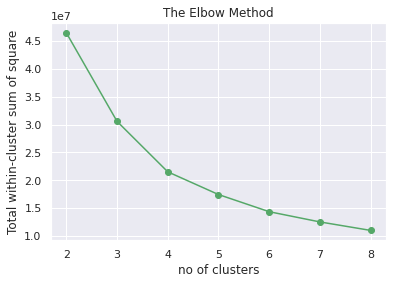

2 of KFold 10


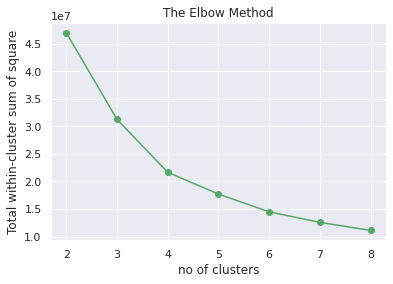

3 of KFold 10


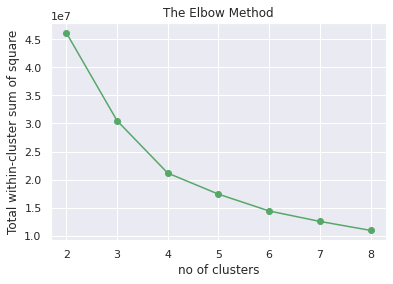

4 of KFold 10


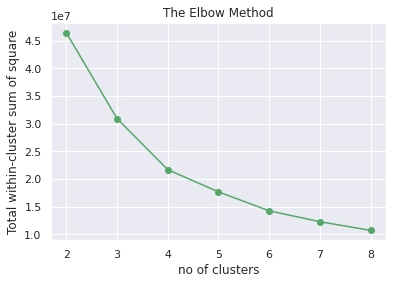

5 of KFold 10


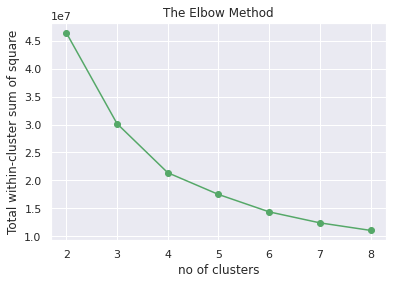

6 of KFold 10


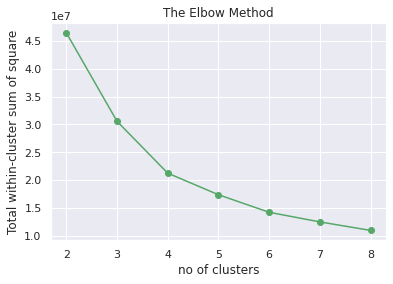

7 of KFold 10


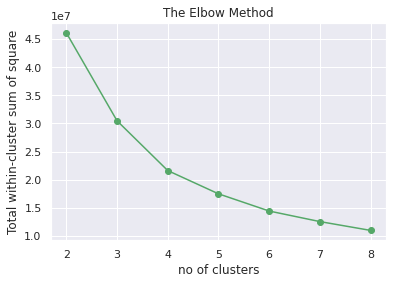

8 of KFold 10


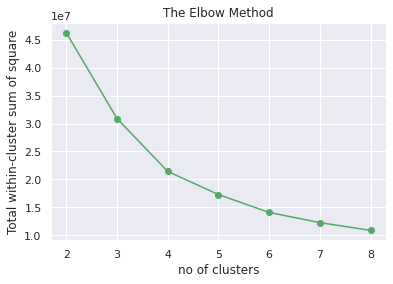

9 of KFold 10


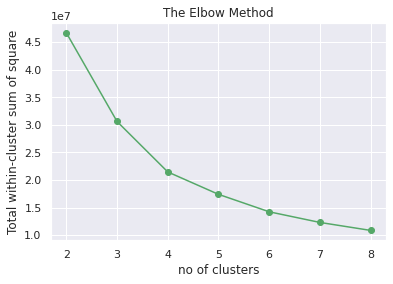

10 of KFold 10


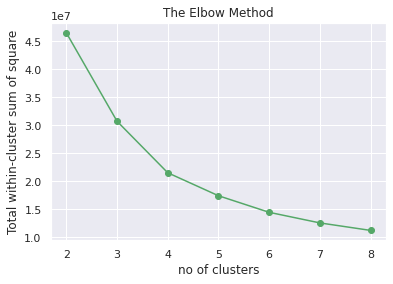

In [73]:
## Elbow method (K-mean method) (stratified cross-validation)
### Ref: https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
i=1
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]

    score = []
    for cluster in range(2,9):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=49)
        kmeans.fit(x_tr)
        score.append(kmeans.inertia_)

    # plotting the score

    plt.plot(range(2,9), score, 'g-o')
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('Total within-cluster sum of square')
    plt.show()
    i+=1
    ## Total within-cluster sum of square: https://www.jamleecute.com/partitional-clustering-kmeans-kmedoid/


For n_clusters = 2 The average silhouette_score is : 0.4056239563849164
For n_clusters = 3 The average silhouette_score is : 0.4120393783806686
For n_clusters = 4 The average silhouette_score is : 0.39985797660773664
For n_clusters = 5 The average silhouette_score is : 0.39027371042782805
For n_clusters = 6 The average silhouette_score is : 0.3707626165116142
For n_clusters = 7 The average silhouette_score is : 0.36509718007822367
For n_clusters = 8 The average silhouette_score is : 0.3546197130873139


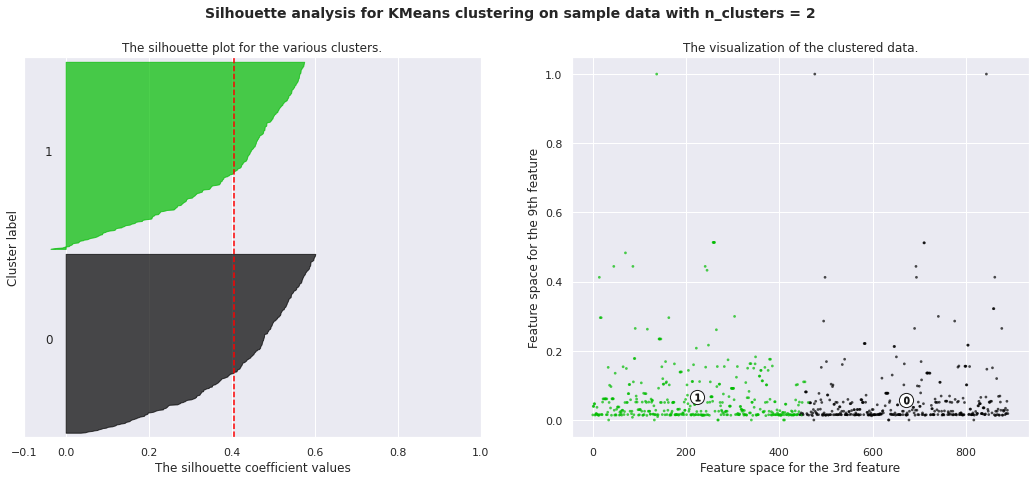

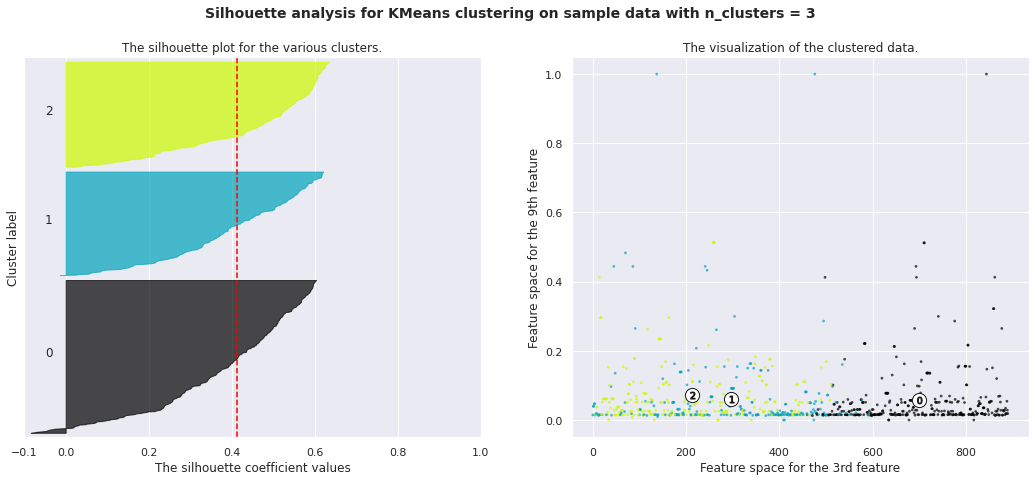

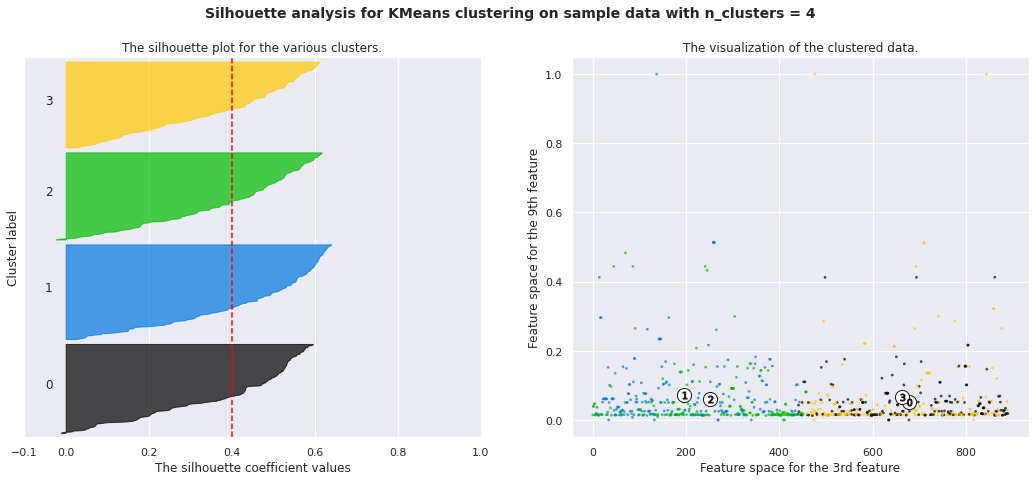

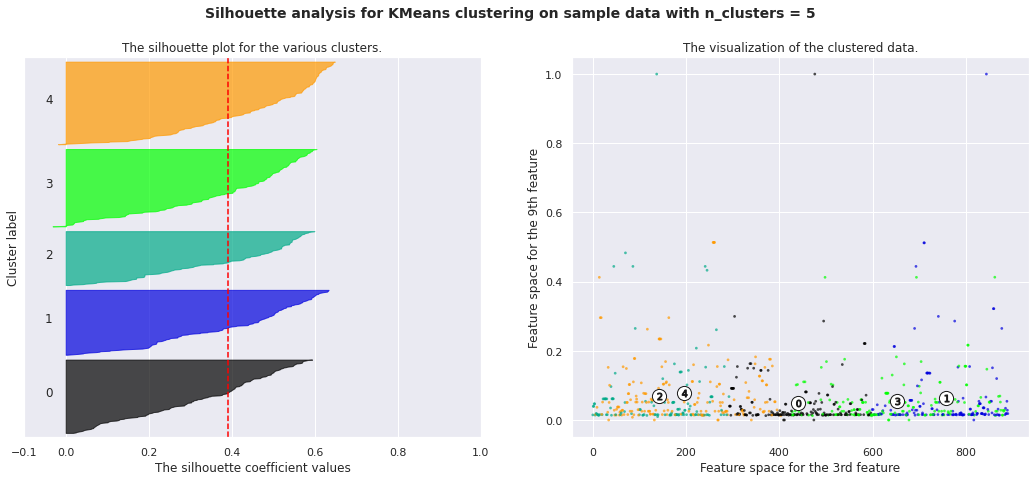

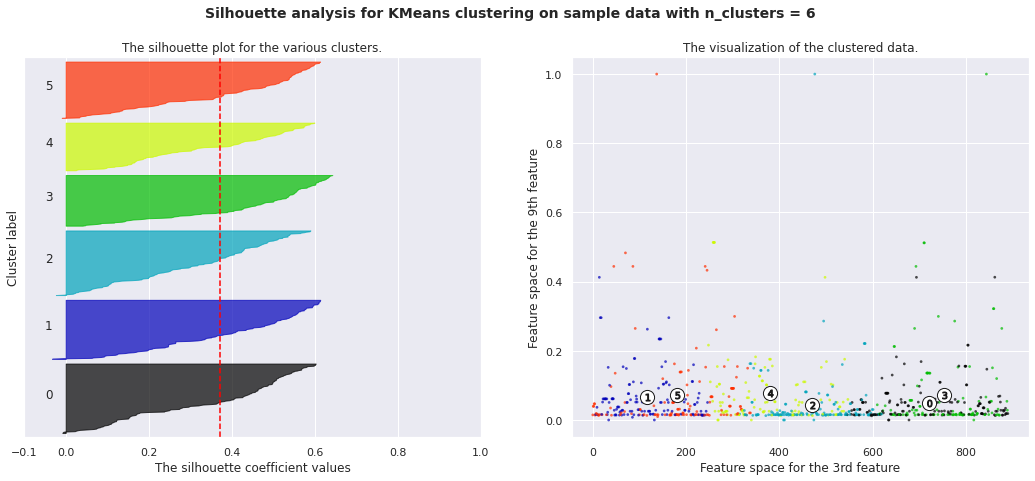

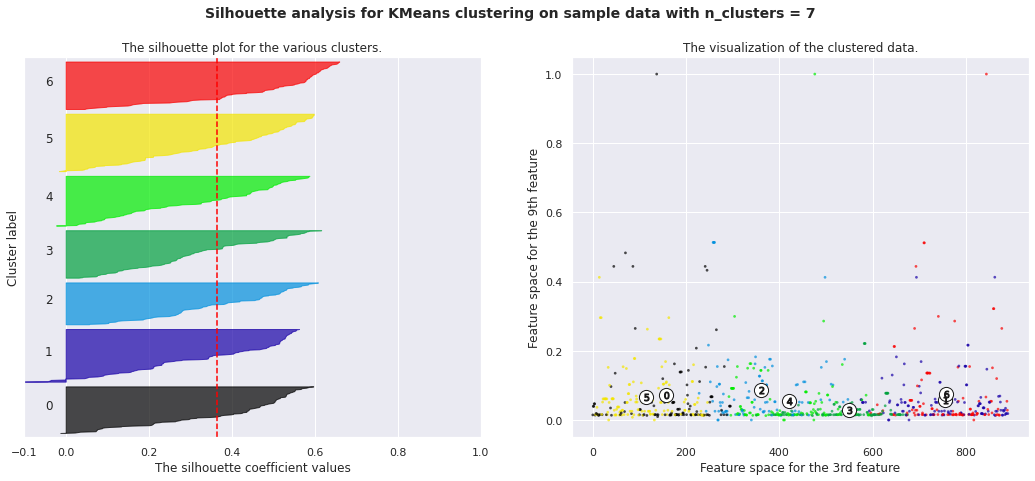

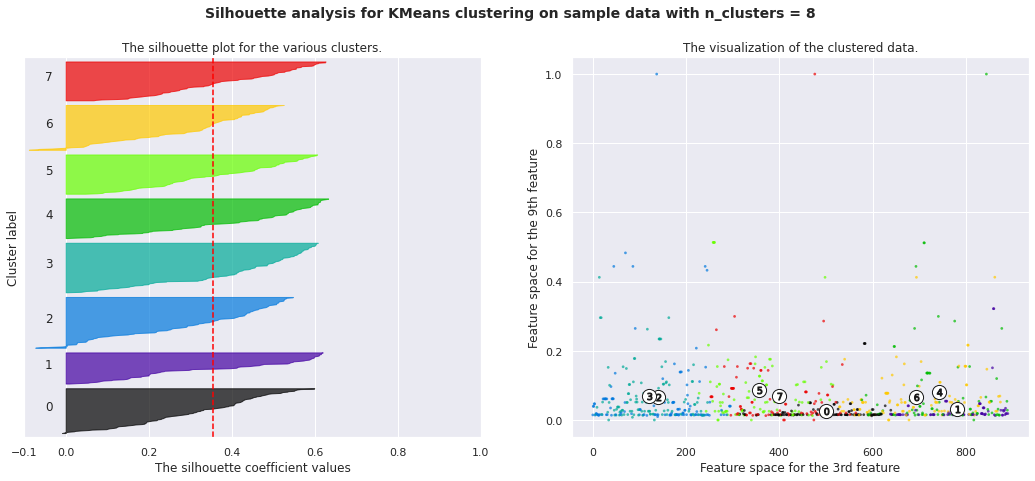

In [77]:
## Silhouette score
### Ref_1: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
### Ref_2: https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette

import matplotlib.cm as cm

silhouette_avg_list = []
n_clusters_list = []
for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_tr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=49)
    cluster_labels = clusterer.fit_predict(x_tr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_tr, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_list += [silhouette_avg]
    n_clusters_list += [n_clusters]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_tr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_tr[:, 2], x_tr[:, 8], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 2], centers[:, 8], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[2], c[8], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 3rd feature")
    ax2.set_ylabel("Feature space for the 9th feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

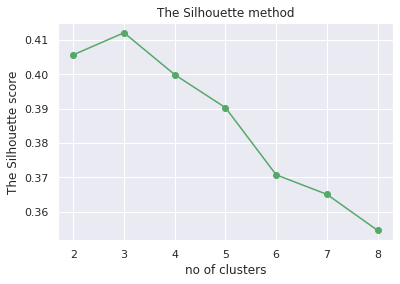

[0.4056239563849164, 0.4120393783806686, 0.39985797660773664, 0.39027371042782805, 0.3707626165116142, 0.36509718007822367, 0.3546197130873139]


In [78]:
plt.plot(n_clusters_list, silhouette_avg_list, 'g-o')
plt.title('The Silhouette method')
plt.xlabel('no of clusters')
plt.ylabel('The Silhouette score')
plt.show()
print(silhouette_avg_list)

### 6.2 K-mean method and save the information

In [79]:
## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=49).fit(x_tr)
kmLabels = kmeans.labels_
Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
centroids = kmeans.cluster_centers_
print('Label:', Label)
print('Centroids',centroids)

Label: [392, 410]
Centroids [[4.87494267e-01 6.84948980e-01 6.71234694e+02 6.53061224e-01
  3.74920793e-01 5.70790816e-02 5.48469388e-02 3.52903061e+02
  5.80672599e-02 1.32400510e+02 1.50510204e+00]
 [5.18709235e-01 6.20731707e-01 2.22787805e+02 6.63414634e-01
  3.65074388e-01 6.34146341e-02 6.91056911e-02 3.19207317e+02
  6.69267648e-02 1.27124390e+02 1.57073171e+00]]


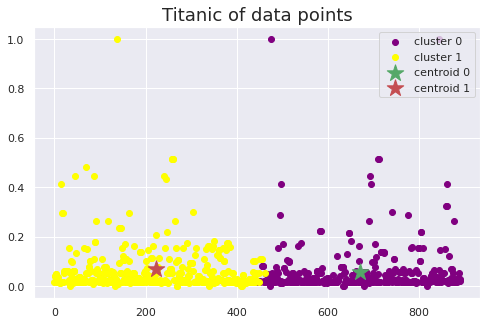

In [81]:
## Ref: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
plt.figure(figsize=(8,5))
plt.title("Titanic of data points", fontsize=18)
plt.grid(True)
plt.scatter(x_tr[kmeans.labels_ == 0, 2], x_tr[kmeans.labels_ == 0, 8],
            c='purple', label='cluster 0')
plt.scatter(x_tr[kmeans.labels_ == 1, 2], x_tr[kmeans.labels_ == 1, 8],
            c='yellow', label='cluster 1')
plt.scatter(centroids[0, 2], centroids[0, 8], marker='*', s=300, c='g', label='centroid 0')
plt.scatter(centroids[1, 2], centroids[1, 8], marker='*', s=300, c='r', label='centroid 1')
plt.legend()
plt.savefig('Titanic_Kmean_10th fold.png', dpi=300)
plt.show()


1 of KFold 10


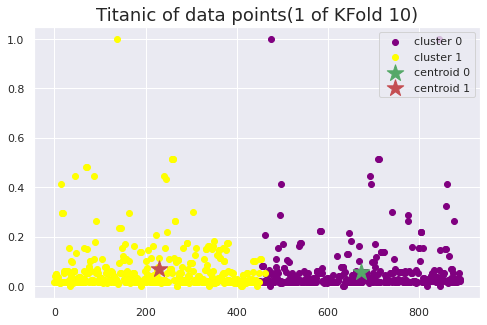

Confusion matrix
 [[25 30]
 [18 17]]
Precision: 0.3617021276595745
Recall: 0.4857142857142857
F1 score: 0.41463414634146345
ROC AUC score: 0.4701298701298702
2 of KFold 10


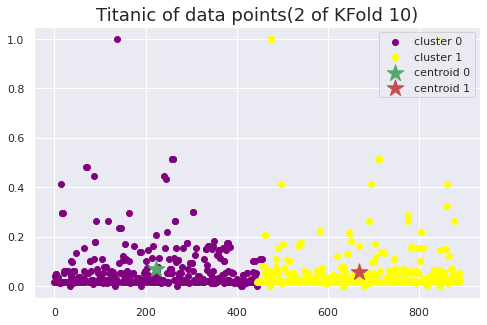

Confusion matrix
 [[21 34]
 [22 12]]
Precision: 0.2608695652173913
Recall: 0.35294117647058826
F1 score: 0.3
ROC AUC score: 0.3673796791443851
3 of KFold 10


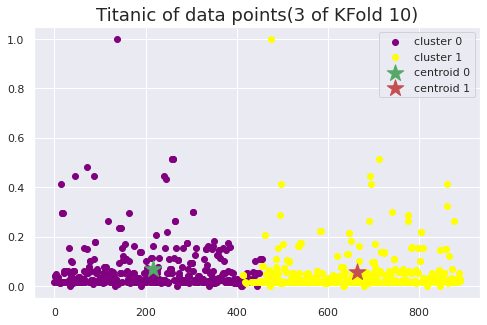

Confusion matrix
 [[26 29]
 [19 15]]
Precision: 0.3409090909090909
Recall: 0.4411764705882353
F1 score: 0.38461538461538464
ROC AUC score: 0.4569518716577541
4 of KFold 10


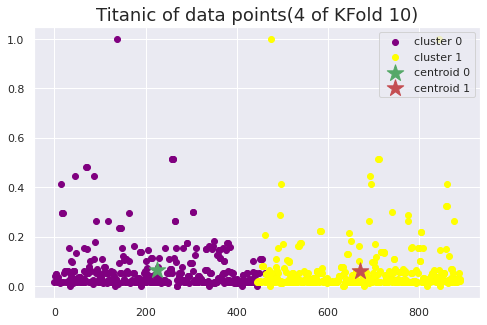

Confusion matrix
 [[31 24]
 [21 13]]
Precision: 0.35135135135135137
Recall: 0.38235294117647056
F1 score: 0.3661971830985916
ROC AUC score: 0.47299465240641714
5 of KFold 10


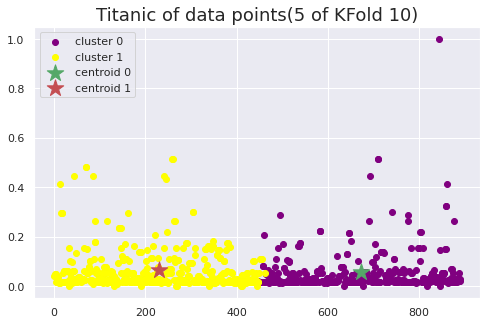

Confusion matrix
 [[30 25]
 [19 15]]
Precision: 0.375
Recall: 0.4411764705882353
F1 score: 0.4054054054054054
ROC AUC score: 0.49331550802139035
6 of KFold 10


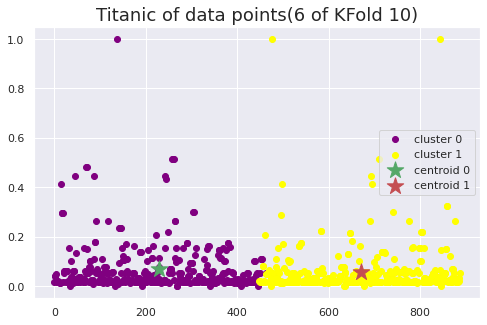

Confusion matrix
 [[30 25]
 [18 16]]
Precision: 0.3902439024390244
Recall: 0.47058823529411764
F1 score: 0.4266666666666667
ROC AUC score: 0.5080213903743316
7 of KFold 10


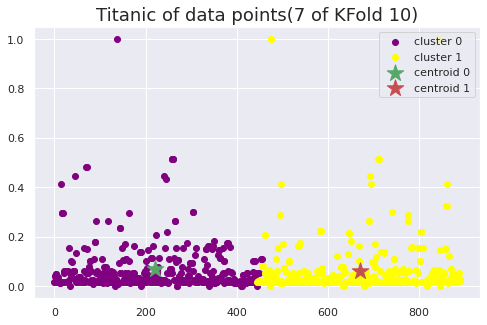

Confusion matrix
 [[26 29]
 [15 19]]
Precision: 0.3958333333333333
Recall: 0.5588235294117647
F1 score: 0.4634146341463415
ROC AUC score: 0.5157754010695187
8 of KFold 10


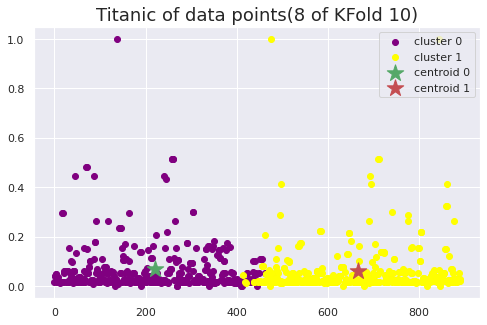

Confusion matrix
 [[25 30]
 [18 16]]
Precision: 0.34782608695652173
Recall: 0.47058823529411764
F1 score: 0.39999999999999997
ROC AUC score: 0.46256684491978617
9 of KFold 10


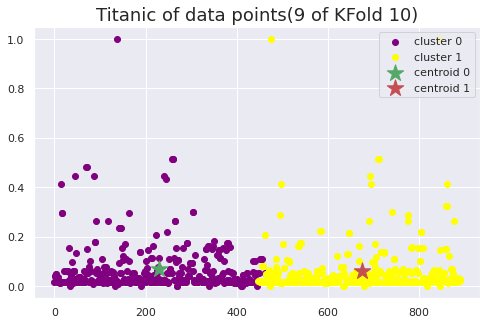

Confusion matrix
 [[31 24]
 [17 17]]
Precision: 0.4146341463414634
Recall: 0.5
F1 score: 0.45333333333333337
ROC AUC score: 0.5318181818181819
10 of KFold 10


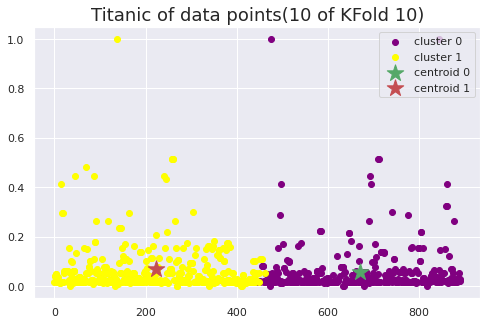

Confusion matrix
 [[32 22]
 [16 19]]
Precision: 0.4634146341463415
Recall: 0.5428571428571428
F1 score: 0.5
ROC AUC score: 0.5677248677248676


In [85]:
## Partition each of the datasets into 10 bins
## , keeping the imbalance ratio from the original dataset 
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
Label_all = []
centroids_all = []

cv_percisionRFnew =[]
cv_recallRFnew =[]
cv_F1scoreRFnew =[]
cv_scoreRFRocnew = []

ConfusionMatrix_all = []

i=1

## Use different 9 bins in training dataset,
## and remain one to be the testing dataset
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=49).fit(x_tr)
    kmLabels = kmeans.labels_
    ## save the centroid and the number of samples in each cluster in each 9 bins
    Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
    Label_all += [Label]
    centroids = kmeans.cluster_centers_
    centroids_all += [centroids]

    ## plot the distribution of samples and the centroids
    plt.figure(figsize=(8,5))
    plt.title("Titanic of data points" "(%d of KFold 10)" %i, fontsize=18)
    plt.grid(True)
    plt.scatter(x_tr[kmeans.labels_ == 0, 2], x_tr[kmeans.labels_ == 0, 8],
                c='purple', label='cluster 0')
    plt.scatter(x_tr[kmeans.labels_ == 1, 2], x_tr[kmeans.labels_ == 1, 8],
                c='yellow', label='cluster 1')
    plt.scatter(centroids[0, 2], centroids[0, 8], marker='*', s=300, c='g', label='centroid 0')
    plt.scatter(centroids[1, 2], centroids[1, 8], marker='*', s=300, c='r', label='centroid 1')
    plt.legend()
    plt.savefig('Titanic_Kmean_' + str(i) + 'of K fold 10.png', dpi=300)
    plt.show()

    ## train and test the dataset in random forest model
    modelRFnew = RandomForestClassifier(random_state=42)
    modelRFnew.fit(x_tr,kmLabels)

    percisionRFnew=precision_score(y_v,modelRFnew.predict(x_v))
    recallRFnew=recall_score(y_v,modelRFnew.predict(x_v))
    F1scoreRFnew=f1_score(y_v,modelRFnew.predict(x_v))
    scoreRFRocnew = roc_auc_score(y_v,modelRFnew.predict(x_v))

    cv_percisionRFnew.append(percisionRFnew)
    cv_recallRFnew.append(recallRFnew)
    cv_F1scoreRFnew.append(F1scoreRFnew)
    cv_scoreRFRocnew.append(scoreRFRocnew)

    print('Confusion matrix\n',confusion_matrix(y_v,modelRFnew.predict(x_v)))
    print('Precision:', precision_score(y_v,modelRFnew.predict(x_v)))
    print('Recall:',recall_score(y_v,modelRFnew.predict(x_v)))
    print('F1 score:', f1_score(y_v,modelRFnew.predict(x_v)))
    print('ROC AUC score:',scoreRFRocnew)
    
    from sklearn.metrics import confusion_matrix    
    ConfusionMatrix = confusion_matrix(y_v, modelRFnew.predict(x_v))
    ConfusionMatrix_all += [ConfusionMatrix]
    i+=1

In [86]:
from statistics import mean, stdev
print("Mean of percision:", round(mean(cv_percisionRFnew),3), '\nStandard Deviation of percision:', round(stdev(cv_percisionRFnew),3))
print("Mean of recall:", round(mean(cv_recallRFnew),3), '\nStandard Deviation of recall:', round(stdev(cv_recallRFnew),3))
print("Mean of F1score:", round(mean(cv_F1scoreRFnew),3), '\nStandard Deviation of F1score:', round(stdev(cv_F1scoreRFnew),3))
print("Mean of Roc score:", round(mean(cv_scoreRFRocnew),3), '\nStandard Deviation of Roc score:', round(stdev(cv_scoreRFRocnew),3))

Mean of percision: 0.37 
Standard Deviation of percision: 0.053
Mean of recall: 0.465 
Standard Deviation of recall: 0.064
Mean of F1score: 0.411 
Standard Deviation of F1score: 0.056
Mean of Roc score: 0.485 
Standard Deviation of Roc score: 0.054
